<a href="https://colab.research.google.com/github/pallavi3105/Machine_Learning_Projects/blob/main/Classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing library**

In [ ]:
import pandas as pd
df=pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text'])

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP)

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sent='Hello friends!How are you?'

In [ ]:
sent='Hello friends!How are you?'
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Hello', 'friends', '!', 'How', 'are', 'you', '?']

In [ ]:
from nltk.corpus import stopwords
swords=stopwords.words('english')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [ ]:
clean=[word for word in word_tokenize(sent) if word not in swords]

In [ ]:
clean

['hello', 'friend', '!', 'how', '?']

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
clean=[ps.stem(word)for word in word_tokenize(sent) if word not in swords]

In [ ]:
sent='Hello friends!How are you? We will be learning Python today'

In [ ]:
def clean_text(sent):
  tokens=word_tokenize(sent)
  clean=[word for word in tokens if word.isdigit() or word.isalpha()]
  clean=[ps.stem(word)for word in clean if word not in swords]
  return clean

#Pre-processing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer=clean_text)
x=df['text']
y=df['label']
x_new=tfidf.fit_transform(x)

In [ ]:
x_new.shape

(5572, 6513)

In [ ]:
tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '050703',
 '0578',
 '06',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07973788240',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '0870',
 '08701213186',
 '08701237397',
 '08701417012',
 '087016248',
 '08701752560',
 '087018728737',
 '0870241182716',
 '08702490080',
 '08702840625',
 '08704439680

In [ ]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
#Data Preparation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,random_state=0,test_size=0.25)

In [ ]:
x_train.shape

(4179, 6513)

In [ ]:
x_test.shape

(1393, 6513)

In [ ]:
#1st algorithm..GuassianNB
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [ ]:
y_pred=nb.predict(x_test.toarray())
y_test.value_counts()

ham     1208
spam     185
Name: label, dtype: int64

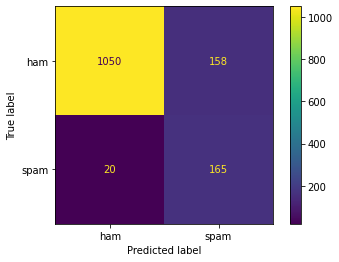

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [ ]:
accuracy_score(y_test,y_pred)

0.8722182340272793

In [ ]:
#2nd algorithm
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

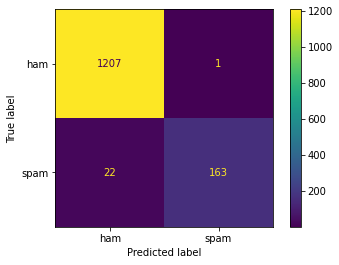

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
accuracy_score(y_test,y_pred)

0.9834888729361091

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
accuracy_score(y_test,y_pred)

0.9641062455132807

In [ ]:
#e Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
params={
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log'],
    'random_state':[0,1,2,3,4],
    'class_weight':['balanced','balanced_subsample']
}
grid=GridSearchCV(rf,param_grid=params,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [ ]:
rf=grid.best_estimator_
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)


0.9791816223977028